In [6]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


# Data Import

In [7]:
camp=pd.read_csv("F:/csv datasets/Placement_Data_Full_Class.csv")

In [8]:
#summary of data
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
camp.head()

In [ ]:
camp.describe()

## EDA

In [9]:

import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py

In [10]:
campdup=camp.groupby('gender')

In [11]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print (x),
      

In [12]:
import numpy as np
import statistics 

In [14]:
import plotly.express as px
fig = px.bar(camp, x=camp.gender, y=camp.gender.values, barmode='group',
             height=400)
fig.show()

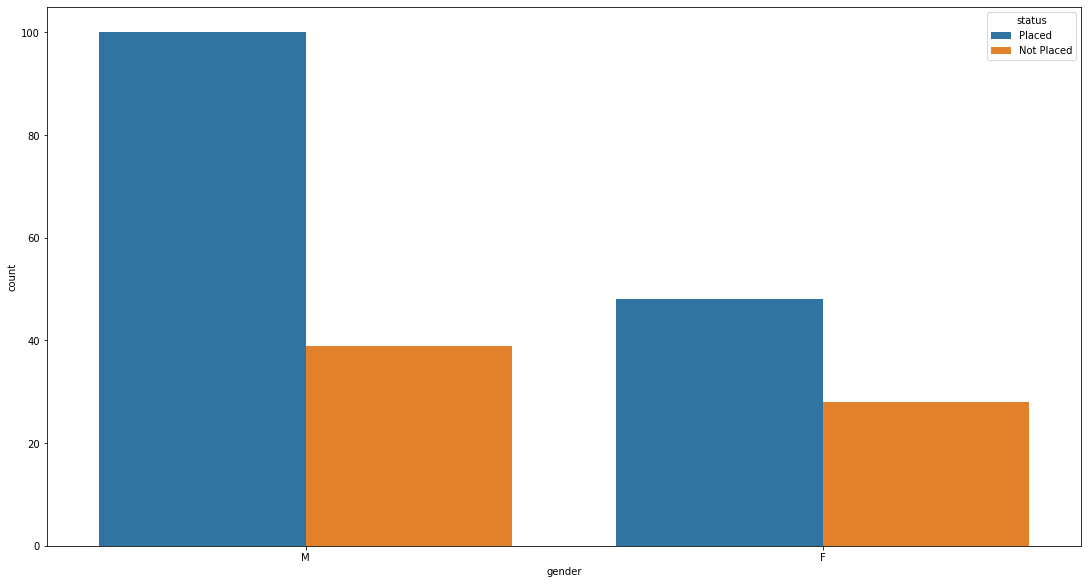

In [15]:
import seaborn as sns


fig=plt.figure(constrained_layout=True,figsize=(15,8))
sns.countplot(x="gender", hue="status", data=camp)

                   #palette={"red": "#FF9999", "white": "#FFE888"})

In [ ]:
#pip install cufflinks

In [16]:
#importing Pandas 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [17]:
Placed = camp[camp['status']=="Placed"]['gender'].value_counts()
Not_Placed = camp[camp['status']=="Not Placed"]['gender'].value_counts()
df1 = pd.DataFrame([Placed,Not_Placed])
layout = dict(xaxis_showgrid=True, yaxis_showgrid=False,plot_bgcolor='rgba(0,0,0,0)')
df1.index = ['Placed','Not_Placed']
df1.iplot(kind='bar',barmode='group', title='Placement by the Gender',layout=layout)


In [18]:
camp["Placed"]=camp[camp["status"]=="Placed"]["hsc_p"]
camp["Not Placed"]=camp[camp["status"]=="Not Placed"]["hsc_p"]
camp[["Placed","Not Placed"]].iplot(kind="histogram", bins=10, theme="white", title="placement According to HSC",
         xTitle='Higher Secondary marks', yTitle='Count')

In [ ]:
camp.gender.value_counts()

In [19]:
camp["Placed"]=camp[camp["status"]=="Placed"]["ssc_p"]
camp["Not Placed"]=camp[camp["status"]=="Not Placed"]["ssc_p"]
camp[["Placed","Not Placed"]].iplot(kind="histogram", bins=10, theme="white", title="placement According to SSC Percentage",
         xTitle='Secondary Percentage', yTitle='Count')

In [20]:
camp["Placed"]=camp[camp["status"]=="Placed"]["degree_p"]
camp["Not Placed"]=camp[camp["status"]=="Not Placed"]["degree_p"]
camp[["Placed","Not Placed"]].iplot(kind="histogram", bins=10, theme="white", title="placement According to Degree Percentage",
         xTitle='Degree Percentage', yTitle='Count')

In [21]:
camp["Placed"]=camp[camp["status"]=="Placed"]["mba_p"]
camp["Not Placed"]=camp[camp["status"]=="Not Placed"]["mba_p"]
camp[["Placed","Not Placed"]].iplot(kind="histogram", bins=10, theme="white", title="placement According to Degree Percentage",
         xTitle='MBA Percentage', yTitle='Count')

In [22]:
def status_to_numeric(x):
    if x=='Placed':
        return 1
    if x=='Not Placed':
        return 0
   

In [23]:
def workex_to_numeric(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0
   

In [24]:
camp['status_num'] = camp['status'].apply(status_to_numeric)
camp['workex_num'] = camp['workex'].apply(workex_to_numeric)

In [25]:
camp[['status_num']] = camp[['status_num']].astype('float64', copy=False)
camp.iplot(kind='bubble', x="hsc_p",y="ssc_p",categories="status", size='workex_num', text='workex', xTitle='hsc_p', yTitle='ssc_p')

C:\Users\ralla\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\ralla\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [26]:
#we will get help from pivot tables to get Fare values in different columns for each class.
layout=dict(title="Box plot with HSC Marks and Status ")
camp[['hsc_p', 'status']].pivot(columns='status', values='hsc_p').iplot(kind='box',layout=layout,xTitle='status',yTitle="hsc_p")


In [27]:
layout=dict(title="Box plot with HSC Marks and Status ")
camp[['ssc_p', 'status']].pivot(columns='status', values='ssc_p').iplot(kind='box',layout=layout,xTitle='status',yTitle="ssc_p")


In [ ]:
df1.head()

In [ ]:
camp.gender.value_counts()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color='time')
df.head()

# Splitting the data

In [49]:
x=camp.drop(['status','salary','sl_no','Placed','Not Placed','status_num','workex_num'],axis=1)
y=camp['status']

x1=x.copy()

In [50]:
x.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [51]:
# Categorical boolean mask
categorical_feature_mask = np.array(x1.dtypes==object)
# filter categorical columns using mask and turn it into a list
categorical_cols = x1.columns[categorical_feature_mask].tolist()

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)


In [53]:
# apply le on categorical feature columns
x1[categorical_cols] = x1[categorical_cols].apply(lambda col: le.fit_transform(col))
x1[categorical_cols].head(10)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,1,1,1,1,2,0,1
1,1,0,1,2,2,1,0
2,1,0,0,0,0,0,0
3,1,0,0,2,2,0,1
4,1,0,0,1,0,0,0
5,1,1,1,2,2,1,0
6,0,1,1,1,0,0,0
7,1,0,0,2,2,1,0
8,1,0,0,1,0,0,0
9,1,0,0,1,0,0,0


In [54]:
x1.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [56]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x1, y, test_size = 0.2, random_state = 0)

# RandomForest Classifier without HyperParameters


In [57]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=20, 
                               bootstrap = True,
                               max_features = 'auto')
rfc.fit(xTrain,yTrain)
# predictions
rfc_predict = rfc.predict(xTest)

In [58]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rfc_cv_score = cross_val_score(rfc,xTrain,yTrain, cv=10, scoring='roc_auc')

In [59]:
print("=== Confusion Matrix ===")
print(confusion_matrix(yTest,rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(yTest,rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - rfc: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[10  5]
 [ 0 28]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.85      1.00      0.92        28

    accuracy                           0.88        43
   macro avg       0.92      0.83      0.86        43
weighted avg       0.90      0.88      0.88        43



=== All AUC Scores ===
[0.91666667 1.         0.81666667 0.83333333 0.96666667 0.91666667
 0.96666667 0.9        0.9        0.90833333]


=== Mean AUC Score ===
Mean AUC Score - rfc:  0.9125


# Random forest classifier with hyperparmeters

In [ ]:
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]

In [ ]:
grid_param={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
           }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestClassifier(random_state=1)
RFR_random=RandomizedSearchCV(estimator=RFR,
                              param_distributions=grid_param,
                             n_iter=500,cv=5,verbose=2,random_state=42,n_jobs=-1)


In [ ]:
RFR_random.fit(x_code,y)
print(RFR_random.best_params_)

In [60]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=1500, 
                               bootstrap = True,
                               max_features = 'sqrt',
                            max_depth=20,
                            min_samples_split=5,
                            min_samples_leaf=2)

random_model=rfc.fit(xTrain,yTrain)
# predictions
rfc_predict = rfc.predict(xTest)


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rfc_cv_score = cross_val_score(rfc,xTrain,yTrain, cv=10, scoring='roc_auc')

In [62]:
print("=== Confusion Matrix ===")
print(confusion_matrix(yTest,rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(yTest,rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - rfc: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 8  7]
 [ 1 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



=== All AUC Scores ===
[0.93055556 1.         0.83333333 0.76666667 0.91666667 0.93333333
 0.98333333 0.93333333 0.85       0.95      ]


=== Mean AUC Score ===
Mean AUC Score - rfc:  0.9097222222222221


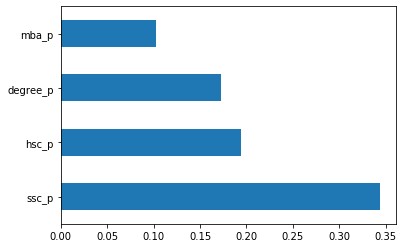

In [64]:
import matplotlib.pyplot as plt


feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')

# one hot coder for KNN neighbours

In [65]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['gender','ssc_b','hsc_b','degree_t','specialisation','hsc_s','workex'])


x_code=encoder.fit_transform(x)

# Converting numerical values into standard scaler

In [66]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_stand = x_code.copy()


# numerical features
num_cols =X_stand.iloc[:,0:21]

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]].values.reshape(-1, 1))
    

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

# Splitting the data into train test split data

In [77]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_stand, y, test_size = 0.2, random_state = 42)

# Knn classifier without HyperParameters

In [78]:
from sklearn.neighbors import KNeighborsClassifier


# knn 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain,yTrain)
knnpred=knn.predict(xTest)

In [79]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn_cv_score = cross_val_score(knn,xTrain,yTrain, cv=10, scoring='roc_auc')

In [80]:
print("=== Confusion Matrix ===")
print(confusion_matrix(yTest,knnpred))
print('\n')
print("=== Classification Report ===")
print(classification_report(yTest,knnpred))
print('\n')
print("=== All AUC Scores ===")
print(knn_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - log: ", knn_cv_score.mean())

=== Confusion Matrix ===
[[ 3  9]
 [ 3 28]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        12
           1       0.76      0.90      0.82        31

    accuracy                           0.72        43
   macro avg       0.63      0.58      0.58        43
weighted avg       0.69      0.72      0.69        43



=== All AUC Scores ===
[0.79861111 0.64583333 0.77272727 0.8030303  0.77272727 0.79166667
 0.775      0.80833333 0.80833333 0.825     ]


=== Mean AUC Score ===
Mean AUC Score - log:  0.7801262626262626


# KNN with hyperparameters

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [82]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(xTrain,yTrain)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 12


In [83]:
knn = KNeighborsClassifier(n_neighbors=10,leaf_size=1,p=2)
#Create x and y variables.

#Split data into training and testing.

#Training the model.
clf=knn.fit(xTrain, yTrain)
#Predict test data set.
y_pred = clf.predict(xTest)
#Checking performance our model with classification report.
print(classification_report(yTest, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(yTest, y_pred)
print(confusion_matrix(yTest,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.78      0.94      0.85        31

    accuracy                           0.77        43
   macro avg       0.73      0.63      0.65        43
weighted avg       0.75      0.77      0.74        43



0.6344086021505376

In [84]:
fg=pd.DataFrame(yTest,y_pred)

# XGB with hyper parameters

In [85]:
# Python libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore')

In [86]:
def model_performance_plot(model) : 
    #conf matrix
    conf_matrix = confusion_matrix(yTest, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(yTest, y_score) , 3)
    fpr, tpr, t = roc_curve(yTest, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(yTest, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [87]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_code, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1524 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2228 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  3.9min finished



 Time taken: 0 hours 3 minutes and 53.83 seconds.


In [88]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.2847455 , 0.33740687, 0.17589917, 0.23106747, 0.09134779,
       0.43714972, 0.07515702, 0.06296372, 0.10593886, 0.05077081,
       0.08994832, 0.04697304, 0.15750971, 0.14011979, 0.20468278,
       0.07675567, 0.33760715, 0.04357471, 0.10533986, 0.08135309,
       0.10174179, 0.20628209, 0.0861506 , 0.1707027 , 0.44914308,
       0.12332907, 0.0957449 , 0.07555652, 0.35739598, 0.14551673,
       0.40436916, 0.21867509, 0.34020557, 0.12612748, 0.27823939,
       0.34540238, 0.04177594, 0.38557959, 0.22886882, 0.17969718,
       0.06696138, 0.25105615, 0.05416884, 0.06476307, 0.41416283,
       0.06736159, 0.18929167, 0.05776677, 0.12972589, 0.39717255,
       0.09294691, 0.10014267, 0.39157596, 0.30422621, 0.5606792 ,
       0.06096511, 0.08834939, 0.113135  , 0.22407188, 0.42955389,
       0.08675032, 0.26204982, 0.34640112, 0.28903461, 0.37858357,
       0.06056528, 0.27424297, 0.08235269, 0.10873742, 0.07795539,
       0.04417467, 0.04237542

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0, tree_method=None,
              validate_parameters=False, verbosity=None)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.8697674418604651

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0}


In [89]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(x))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [90]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=1.0, gamma=1.5, learning_rate=0.01,
                           max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
                           n_estimators=750, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=1.0)

xgb_clf.fit(xTrain, yTrain)
y_pred = xgb_clf.predict(xTest)
y_score = xgb_clf.predict_proba(xTest)[:,1]

model_performance_plot('xgb_clf')

# logistic regresssion with hyper parameters

In [95]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_stand, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.877056 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.856854 (0.074283) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.856854 (0.074283) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856854 (0.074283) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856854 (0.074283) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.856854 (0.074283) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.856854 (0.074283) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856854 (0.074283) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856854 (0.074283) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

In [98]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_stand, y, test_size = 0.2, random_state = 1)

In [99]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression(random_state=0,C=1.0,penalty='l2',solver='newton-cg')
model=logic.fit(xTrain,yTrain)
logpred=logic.predict(xTest)

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
log_cv_score = cross_val_score(logic,xTrain,yTrain, cv=10, scoring='roc_auc')

In [101]:
print("=== Confusion Matrix ===")
print(confusion_matrix(yTest,logpred))
print('\n')
print("=== Classification Report ===")
print(classification_report(yTest,logpred))
print('\n')
print("=== All AUC Scores ===")
print(log_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - log: ", log_cv_score.mean())

=== Confusion Matrix ===
[[13  2]
 [ 1 27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      0.96      0.95        28

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.93      0.93      0.93        43



=== All AUC Scores ===
[0.98611111 0.97222222 0.93333333 0.88333333 0.98333333 0.9
 0.93333333 0.88333333 0.98333333 0.9       ]


=== Mean AUC Score ===
Mean AUC Score - log:  0.9358333333333334
